In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [11]:
data=pd.read_csv(r'C:\Users\aravi\Desktop\gld_price_data.csv')
#converting string to raw string as it shows error

In [12]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


gld represents the gold price
spx represents the stock market index
usd represents the US dollar index
EUR/USD represents the Euro to US dollar exchange rate


In [13]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [14]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
data.shape

(2290, 6)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

 checking correlation(strength of relationship between the variables) to find the important features

In [20]:
correlation=data.corr()

C:\Users\aravi\AppData\Local\Temp\ipykernel_11636\1603153744.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


<Axes: >

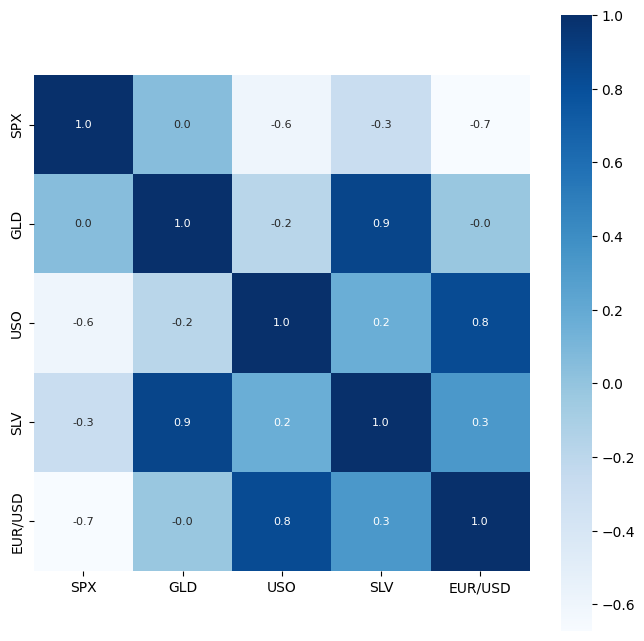

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [22]:
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


C:\Users\aravi\AppData\Local\Temp\ipykernel_11636\3364355533.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='red')


<Axes: xlabel='GLD', ylabel='Density'>

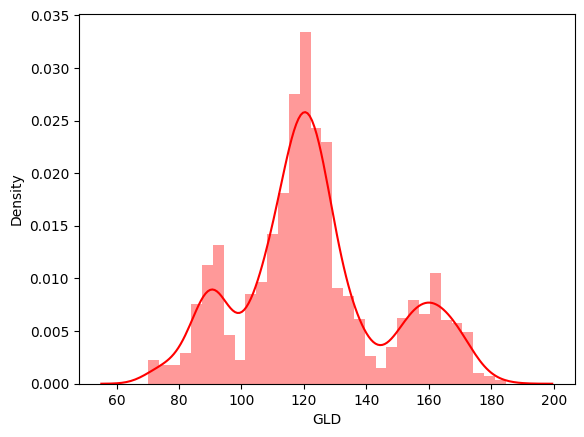

In [23]:
sns.distplot(data['GLD'],color='red')

In [24]:
data=data.drop(['Date'],axis=1)

In [25]:
x=data.drop(['GLD'],axis=1)

In [27]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
y=data['GLD']

In [28]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

Random forest

In [30]:
r=RandomForestRegressor(n_estimators=100)


In [31]:
r.fit(xtrain,ytrain)

RandomForestRegressor()

In [35]:
train_prediction=r.predict(xtrain)

In [36]:
print(train_prediction)

[109.94039808 114.7519008   90.59190015 ... 130.73749675 159.91489599
 114.66429988]


In [45]:
train_error=metrics.r2_score(ytrain,train_prediction)

In [46]:
print(train_error)

0.9984732183883654


In [39]:
ypred=r.predict(xtest)

In [40]:
print(ypred)

[168.44919941  81.9498999  116.12750008 127.67860079 120.63270097
 154.7688974  150.74889806 126.22660017 117.37029884 126.07670014
 116.52640118 171.92440093 141.50939838 167.76769818 115.02810019
 117.64530069 139.23230286 170.16280066 159.06930308 158.55269947
 155.11860068 124.87910021 176.57330042 156.82730307 125.2452006
  93.80499929  77.19700006 120.39630034 119.1567996  167.39430004
  88.11010054 125.2717999   91.19270096 117.65860032 121.09119908
 136.46650169 115.56030118 114.97350062 147.62899921 107.06590087
 104.80860266  87.42829789 126.45300027 117.97320035 153.89849928
 119.53460048 108.29709999 107.83189835  93.19980081 127.09289783
  75.05710015 113.6686993  121.4033999  111.30209897 118.95229886
 120.58269961 158.9349003  168.30170106 147.15489667  85.81889846
  94.53210022  86.77249879  90.62770011 118.85250105 126.48350066
 127.53949979 168.64560023 122.27459941 117.29579881  98.76310042
 168.51790207 143.12369953 131.58300254 121.11880224 121.00619955
 119.824700

In [47]:
testerror=metrics.r2_score(ytest,ypred)

In [48]:
print(testerror)

0.988796745786141


In [49]:
y_test=list(ytest)

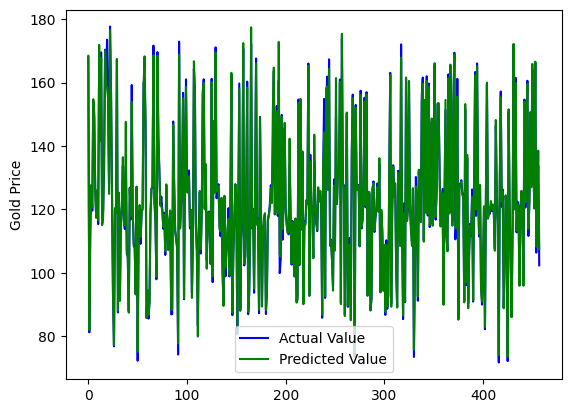

In [50]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(ypred,color='green',label='Predicted Value')
plt.ylabel('Gold Price')
plt.legend()
plt.show()